1.) I design my own classfication problem here in ARFF Format, and saves it as a .arff file in the path containing this file. My dataset is simulated NHL player data, details are in the comment at the bottom of the cell below.

In [16]:
import random

'''DATASET 1: Design your own classification problem in ARFF format'''

def generate_player_data(num_players):
    player_data = []

    def str_from_pts(points):  #Returns strength label based on points as input
        strength = ''
        labels = ['Elite', 'Star', 'Top', 'Good', 'Average', 'Bottom']  #Strength labels
        caps = [80, 60, 50, 40, 20, 0]  #Sets minimum points for each label

        for i in range(0, 6):
            if points >= caps[i]:
                strength = labels[i]
                break
        return strength
        
    for i in range(1, num_players + 1):
        goals = random.randint(0, 70)  #Picks from a reasonable goal range based on my NHL viewing experience (0 to 70)
        assists = random.randint(0, 100)  #Picks from a reasonable assist range based on my NHL viewing experience (0 to 100)
        points = goals + assists  #Points = goals + assists

        #Randomly generates height in feet and inches from standard ranges
        height_ft = random.randint(5, 6)  #Feet
        height_in = random.randint(0, 11)  #Inches

        height = f"{height_ft}ft{height_in}in"  #Height in ft and inches (no quotes)

        #Randomly generates weight in pounds
        weight = random.randint(150, 250)  #Weight in lbs (150 to 250 lbs)
        
        player = {
            'player_name': f'Player{i}',  #Assigns player name as player number
            'goals': goals,  #Calls from earlier
            'assists': assists,  #Calls from earlier
            'points': points,  #Calls from earlier
            'shots': random.randint(50, 350),  #Picks from a reasonable shot range (50 to 350)
            'ice_time_per_game': round(random.uniform(15, 25), 1),  #Ice time range (15 to 25 minutes)
            'penalty_minutes': random.randint(0, 150),  #Penalty minutes range (0 to 150)
            'position': random.choice(['Forward', 'Defenseman', 'Goalie']),  #Randomly assigns positions
            'team': random.choice(['Team_A', 'Team_B', 'Team_C', 'Team_D']),  #Randomly assigns team these are not real NHL teams
            'age': random.randint(18, 45),  #Picks from a reasonable age range (18 to 45)
            'games_played': random.randint(0, 82),  #Games played range (0 to 82)
            'strength': str_from_pts(points),  #Generate and assign strength class
            'height': height,  #Height in ft and in (no quotes)
            'weight': weight,  #Weight in lbs
            'ethnicity': random.choice(['Asian', 'Black', 'Caucasian', 'Hispanic', 'Other']),  #Randomly assigns ethnicity
            'nationality': random.choice(['USA', 'Canada', 'Sweden', 'Finland', 'Russia']),  #Randomly assigns nationality
            'economic_background': random.choice(['Low', 'Middle', 'High'])  #Randomly assigns economic background
        }
        player_data.append(player)
    
    return player_data

#Generates ARFF formatted data using the player data generator as a function inside
def generate_arff(num_players):
    header = '''@RELATION nhl_player_performance

@ATTRIBUTE player_name STRING
@ATTRIBUTE goals NUMERIC
@ATTRIBUTE assists NUMERIC
@ATTRIBUTE points NUMERIC
@ATTRIBUTE shots NUMERIC
@ATTRIBUTE ice_time_per_game NUMERIC
@ATTRIBUTE penalty_minutes NUMERIC
@ATTRIBUTE position {Forward, Defenseman, Goalie}
@ATTRIBUTE team {Team_A, Team_B, Team_C, Team_D}
@ATTRIBUTE age NUMERIC
@ATTRIBUTE games_played NUMERIC
@ATTRIBUTE strength {Elite, Star, Top, Good, Average, Bottom}
@ATTRIBUTE height STRING
@ATTRIBUTE weight NUMERIC
@ATTRIBUTE ethnicity {Asian, Black, Caucasian, Hispanic, Other}
@ATTRIBUTE nationality {USA, Canada, Sweden, Finland, Russia}
@ATTRIBUTE economic_background {Low, Middle, High}

@DATA'''
    
    #Generates player data
    players = generate_player_data(num_players)
    #Converts player data to ARFF format
    data_lines = []
    for player in players:
        data_line = f"'{player['player_name']}', {player['goals']}, {player['assists']}, {player['points']}, {player['shots']}, {player['ice_time_per_game']}, {player['penalty_minutes']}, '{player['position']}', '{player['team']}', {player['age']}, {player['games_played']}, '{player['strength']}', '{player['height']}', {player['weight']}, '{player['ethnicity']}', '{player['nationality']}', '{player['economic_background']}'"
        data_lines.append(data_line)
    
    #Combines headers and data
    arff_content = header + "\n" + "\n".join(data_lines)
    
    return arff_content

#Outputs the ARFF file content with 50 random players
arff_file_content = generate_arff(50)
#print(arff_file_content)

#Saves as ARFF file type to the current working directory
arff_file_path = 'nhl_player_data.arff'
with open(arff_file_path, 'w') as f:
    f.write(arff_file_content)


'''This dataset is a generated collection of NHL player data in ARFF format, based on random numbers currently but could be optimized with distributions with more work. The features are: position, team, age, height, weight, ethnicity, nationality, economic background. The targets are: Strength, goals, assists, points, shots, ice time per game, and penalty minutes. There are ranges for all numerical data assigned based on my own experience following the National Hockey League since I was a kid, and the main target variable is ultimately the column 'strength'. I want to be able to train a model to predict the strength of a player based on the features. There are more targets to allow for flexibility to investigate other potential properties of the data. There is room for tightening the way this training data is generated, but ultimately this data could simply be used to pinpoint talent based on easily accessible features. The main target I am going to be using here is Strength.
'''


"This dataset is a generated collection of NHL player data in ARFF format, based on random numbers currently but could be optimized with distributions with more work. The features are: position, team, age, height, weight, ethnicity, nationality, economic background. The targets are: Strength, goals, assists, points, shots, ice time per game, and penalty minutes. There are ranges for all numerical data assigned based on my own experience following the National Hockey League since I was a kid, and the main target variable is ultimately the column 'strength'. I want to be able to train a model to predict the strength of a player based on the features. There are more targets to allow for flexibility to investigate other potential properties of the data. There is room for tightening the way this training data is generated, but ultimately this data could simply be used to pinpoint talent based on easily accessible features. The main target I am going to be using here is Strength.\n"

The following code verifies the dataset is in proper ARFF Format via the liac-arff library

In [17]:
import arff  #liac-arff library

#Validates the formatting of the ARFF file
def verify_arff(file_path):
    try:
        with open(file_path, 'r') as file:
            arff_data = arff.load(file)
        
        return 'ARFF file is valid.'
    
    except Exception as e:
        return f"ARFF file is invalid: {e}"

print(verify_arff(arff_file_path))

ARFF file is valid.


I open the .arff file saved in the previous cell, and then load my dataset into Pandas for later use as nhl_player_data and then X1, Y1 are features and targets of df1, respectively.

DATASET 1: Converted from .arff to dataframe and preprocessed. No imputing necessary as I created this dataset. The dataset sample printed after the encoded features is the raw data before imputing and encoding. I was a bit lazy here. I am sure I can craft my data more efficiently.

In [18]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

#Loads the data into a pandas DataFrame
def load_data_to_dataframe(arff_file):
    df = pd.read_csv(arff_file, comment='@', header=None)
    df.columns = [
        'player_name', 'goals', 'assists', 'points', 'shots',
        'ice_time_per_game', 'penalty_minutes', 'position',
        'team', 'age', 'games_played', 'strength',
        'height', 'weight', 'ethnicity', 'nationality', 'economic_background'
    ]
    return df

#Separates features and targets according to my design
def features_targets(df):
    X = df.drop(columns=['goals', 'assists', 'points', 'shots', 'ice_time_per_game', 'penalty_minutes', 'games_played', 'strength'])  #features
    Y = df[['goals', 'assists', 'points', 'shots', 'ice_time_per_game', 'penalty_minutes', 'games_played', 'strength']]  #targets
    return X, Y

#Loads data in pandas using the function defined previously
arff_file_path = 'nhl_player_data.arff' 
nhl_player_data = load_data_to_dataframe(arff_file_path)
X1, Y1 = features_targets(nhl_player_data)

#Converts feature columns to categorical data types - excluding player_name (necessary to encode as I made this dataset myself)
categorical_columns = ['position', 'team', 'ethnicity', 'nationality', 'economic_background']
X1[categorical_columns] = X1[categorical_columns].astype('category')

#Uses One-Hot Encoding for categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
X1_encoded = encoder.fit_transform(X1[categorical_columns])

#prints a sample
print("Encoded Features (X2):\n", X1_encoded[:1])
print("-----------------------------")
print("Features(X2):\n")
print(X1.head(1))
print("-----------------------------")
print("Targets (Y2):\n")
print(Y1.head(1))

Encoded Features (X2):
 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]]
-----------------------------
Features(X2):

  player_name       position       team  age      height  weight ethnicity  \
0   'Player1'   'Defenseman'   'Team_A'   34   '5ft11in'     172   'Other'   

  nationality economic_background  
0    'Sweden'               'Low'  
-----------------------------
Targets (Y2):

   goals  assists  points  shots  ice_time_per_game  penalty_minutes  \
0     15       13      28    166               24.9              114   

   games_played    strength  
0            65   'Average'  


2.) I used my dataset from above and also 'kr-vs-kp', 'vote', 'credit-approval', datasets from OpenML as specified. I fetched the new datasets via the openml package, named them 'kr_vs_kp', 'vote', 'credit_approval', and specify features and targets as (X2,X3,X4), (Y2,Y3,Y4), respectively, as before. I then impute values, and encode categorical features. The dataset sample printed after the encoded features is the raw data before imputing and encoding. All sample are one row to save space.

DATASET 2: fetched and preprocessed

In [31]:
#Dataset 2
import openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
#Fetches dataset
kr_vs_kp = openml.datasets.get_dataset(3)

#Gets features, targets, and associated meta information
X2, Y2, _, _ = kr_vs_kp.get_data(target=kr_vs_kp.default_target_attribute)

imputer = SimpleImputer(strategy='most_frequent') #used to impute - I don't like removing data or misaligning data
encoder = OrdinalEncoder() #used to encode. We only have two classes per attribute so I use OrdinalEncoder

#Imputes missing values in X2 and Y2
X2_imputed = imputer.fit_transform(X2)
Y2_imputed = imputer.fit_transform(Y2.values.reshape(-1, 1)).ravel()

#encodes features and targets from 'imputed' datasets
X2_encoded = encoder.fit_transform(X2_imputed)

#prints a sample
print("Encoded Features (X2):\n", X2_encoded[:1])
print("-----------------------------")
print("Features(X2):\n")
print(X2.head(1))
print("-----------------------------")
print("Targets (Y2):\n")
print(Y2.head(1))

Encoded Features (X2):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]]
-----------------------------
Features(X2):

  bkblk bknwy bkon8 bkona bkspr bkxbq bkxcr bkxwp blxwp bxqsq  ... skrxp  \
0     f     f     f     f     f     f     f     f     f     f  ...     f   

  spcop stlmt thrsk wkcti wkna8 wknck wkovl wkpos wtoeg  
0     f     f     f     f     f     f     t     t     n  

[1 rows x 36 columns]
-----------------------------
Targets (Y2):

0    won
Name: class, dtype: category
Categories (2, object): ['won' < 'nowin']


DATASET 3: fetched and preprocessed

In [20]:
#Dataset 3

#Fetches dataset
vote = openml.datasets.get_dataset(56)

#Gets targets,features and associated meta information
X3, Y3, _, _ = vote.get_data(target=vote.default_target_attribute)

'''
imputer = SimpleImputer(strategy='most_frequent') #used to impute - I don't like removing data or misaligning data
encoder = OrdinalEncoder() #used to encode. We only have two classes per attribute so I use OrdinalEncoder
'''

#Imputes missing values in X3 and Y3
X3_imputed = imputer.fit_transform(X3)
Y3_imputed = imputer.fit_transform(Y3.values.reshape(-1, 1)).ravel()

#encodes features and targets from 'imputed' datasets
X3_encoded = encoder.fit_transform(X3_imputed)


#prints a sample
print("Encoded Features (X3):\n", X3_encoded[:1])
print("-----------------------------")
print("Features(X3):\n")
print(X3.head(1))
print("-----------------------------")
print("Targets (Y3):\n")
print(Y3.head(1))

Encoded Features (X3):
 [[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1.]]
-----------------------------
Features(X3):

  handicapped-infants water-project-cost-sharing  \
0                   n                          y   

  adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
0                                 n                    y               y   

  religious-groups-in-schools anti-satellite-test-ban  \
0                           y                       n   

  aid-to-nicaraguan-contras mx-missile immigration  \
0                         n          n           y   

  synfuels-corporation-cutback education-spending superfund-right-to-sue  \
0                          NaN                  y                      y   

  crime duty-free-exports export-administration-act-south-africa  
0     y                 n                                      y  
-----------------------------
Targets (Y3):

0    republican
Name: Class, dtype: category
Categories (2, objec

DATASET 4: Fetched and Preprocessed

In [21]:
#Dataset 4

#Fetches dataset
credit_approval = openml.datasets.get_dataset(29)

#Gets targets,features and associated meta information
X4, Y4, _, _ = credit_approval.get_data(target=credit_approval.default_target_attribute)

'''
imputer = SimpleImputer(strategy='most_frequent') #used to impute - I don't like removing data or misaligning data
encoder = OrdinalEncoder() #used to encode. We only have two classes per attribute so I use OrdinalEncoder
'''

#Imputes missing values in X4 and Y4
X4_imputed = imputer.fit_transform(X4)
Y4_imputed = imputer.fit_transform(Y4.values.reshape(-1, 1)).ravel()

#encodes features and targets from 'imputed' datasets
X4_encoded = encoder.fit_transform(X4_imputed)


#prints a sample
print("Encoded Features (X4):\n", X4_encoded[:1])
print("-----------------------------")
print("Features(X4):\n")
print(X4.head(1))
print("-----------------------------")
print("Targets (Y4):\n")
print(Y4.head(1))

Encoded Features (X4):
 [[  1. 156.   0.   1.   0.  12.   7.  30.   1.   1.   1.   0.   0.  68.
    0.]]
-----------------------------
Features(X4):

  A1     A2   A3 A4 A5 A6 A7    A8 A9 A10  A11 A12 A13    A14  A15
0  b  30.83  0.0  u  g  w  v  1.25  t   t  1.0   f   g  202.0  0.0
-----------------------------
Targets (Y4):

0    +
Name: class, dtype: category
Categories (2, object): ['+' < '-']


Decision Tree for DATASET 1:

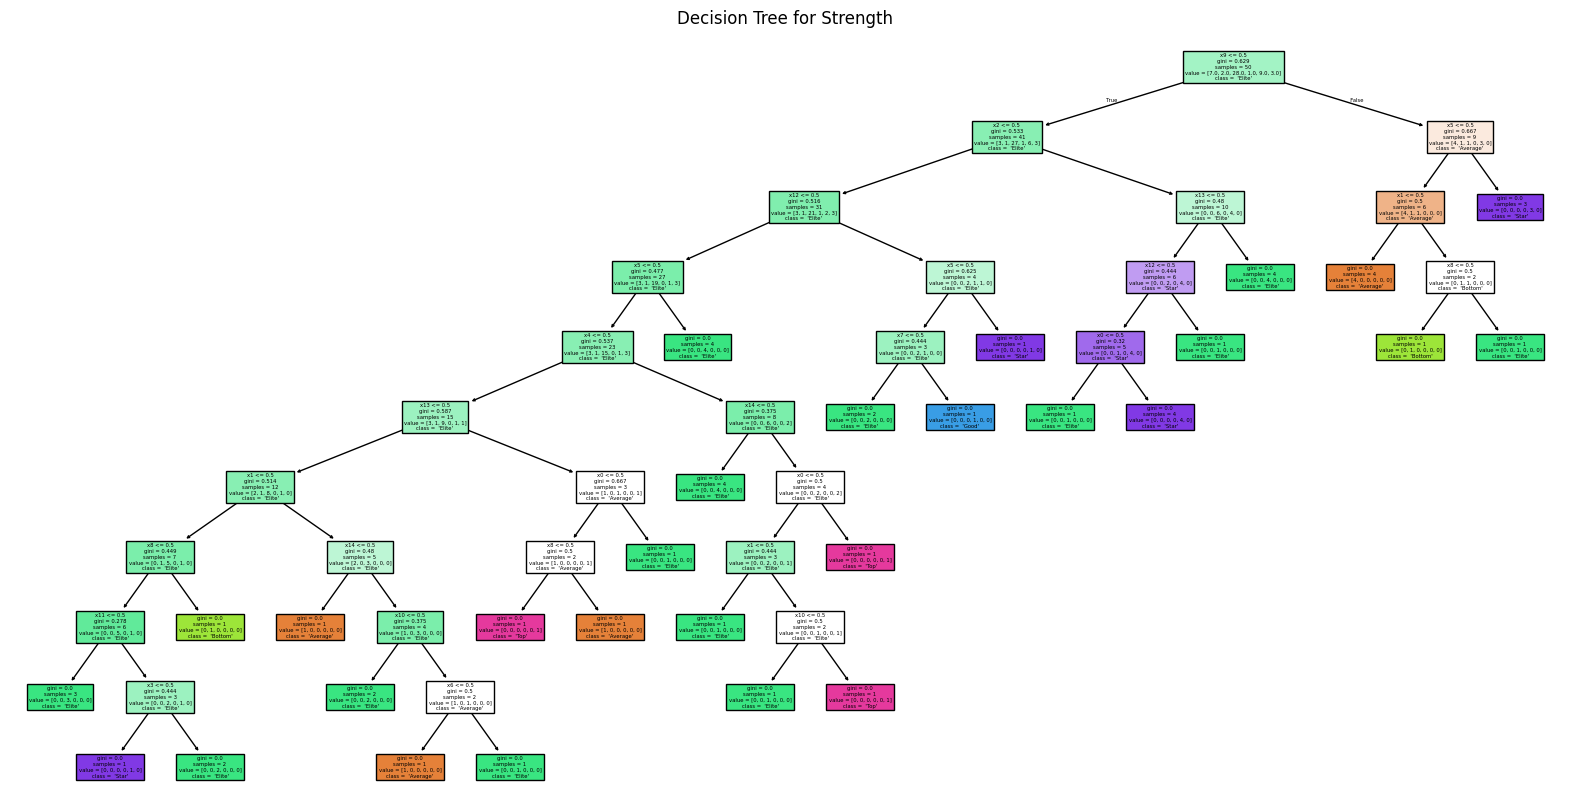

In [29]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

X1_array = X1_encoded  #turns X1_encoded into an array
Y1_array = Y1_array = Y1['strength'].values  # Converts 'strength' (the target variable) to an array

#Initializes the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

# Fits the tree
clf.fit(X1_array, Y1_array)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(), class_names=np.unique(Y1_array))
plt.title("Decision Tree for Strength")
plt.show()

Decision Tree for Dataset 2:

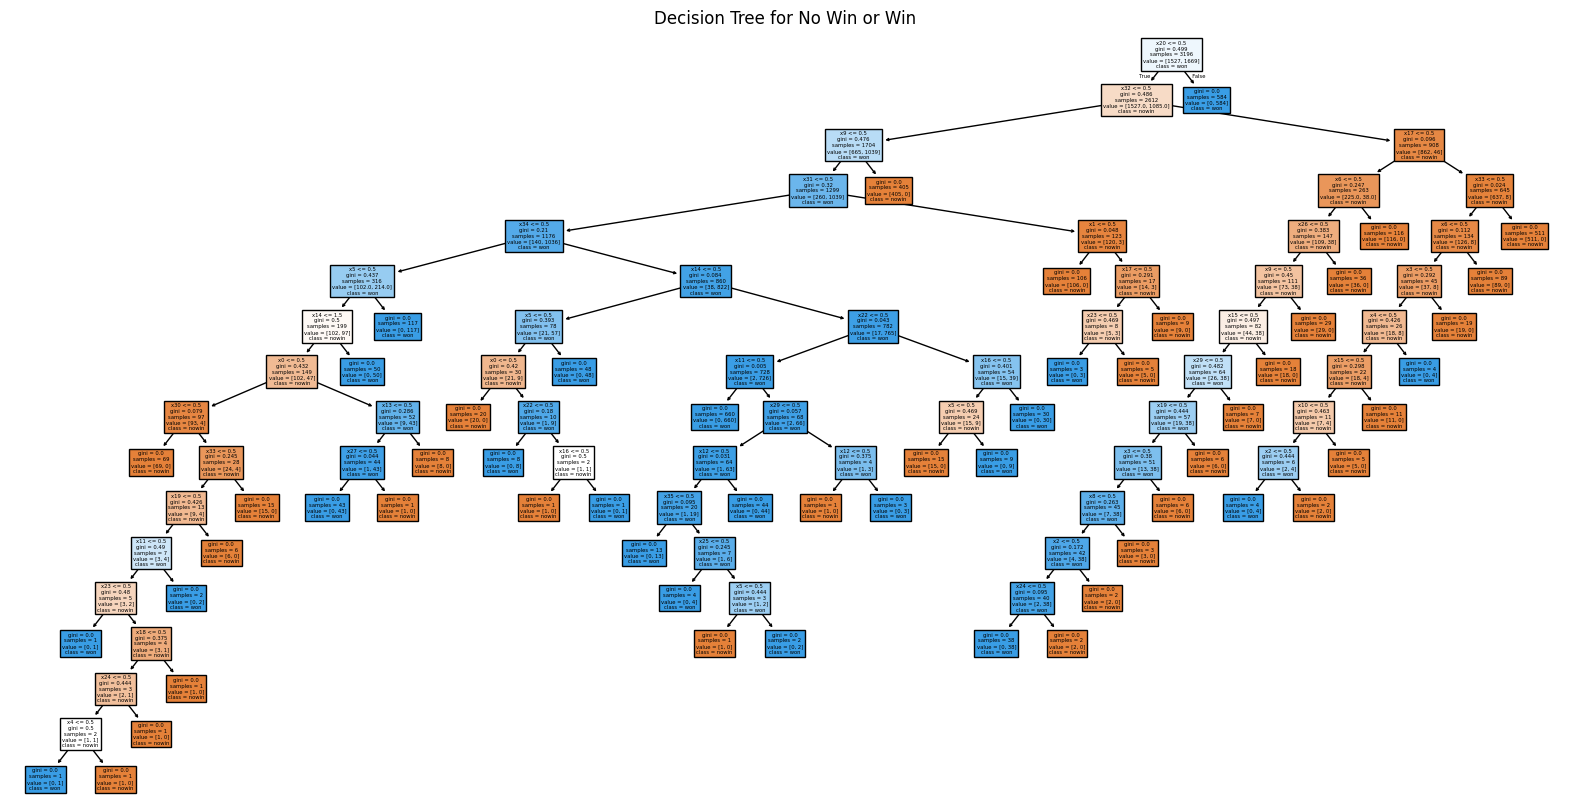

In [32]:

#imputed and encoded transformations are already arrays
X2_array = X2_encoded
Y2_array = Y2_imputed 

#Fits the tree
clf.fit(X2_array, Y2_array)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(), class_names=np.unique(Y2_array))
plt.title("Decision Tree for No Win or Win")
plt.show()

Decision Tree for DATASET 3:

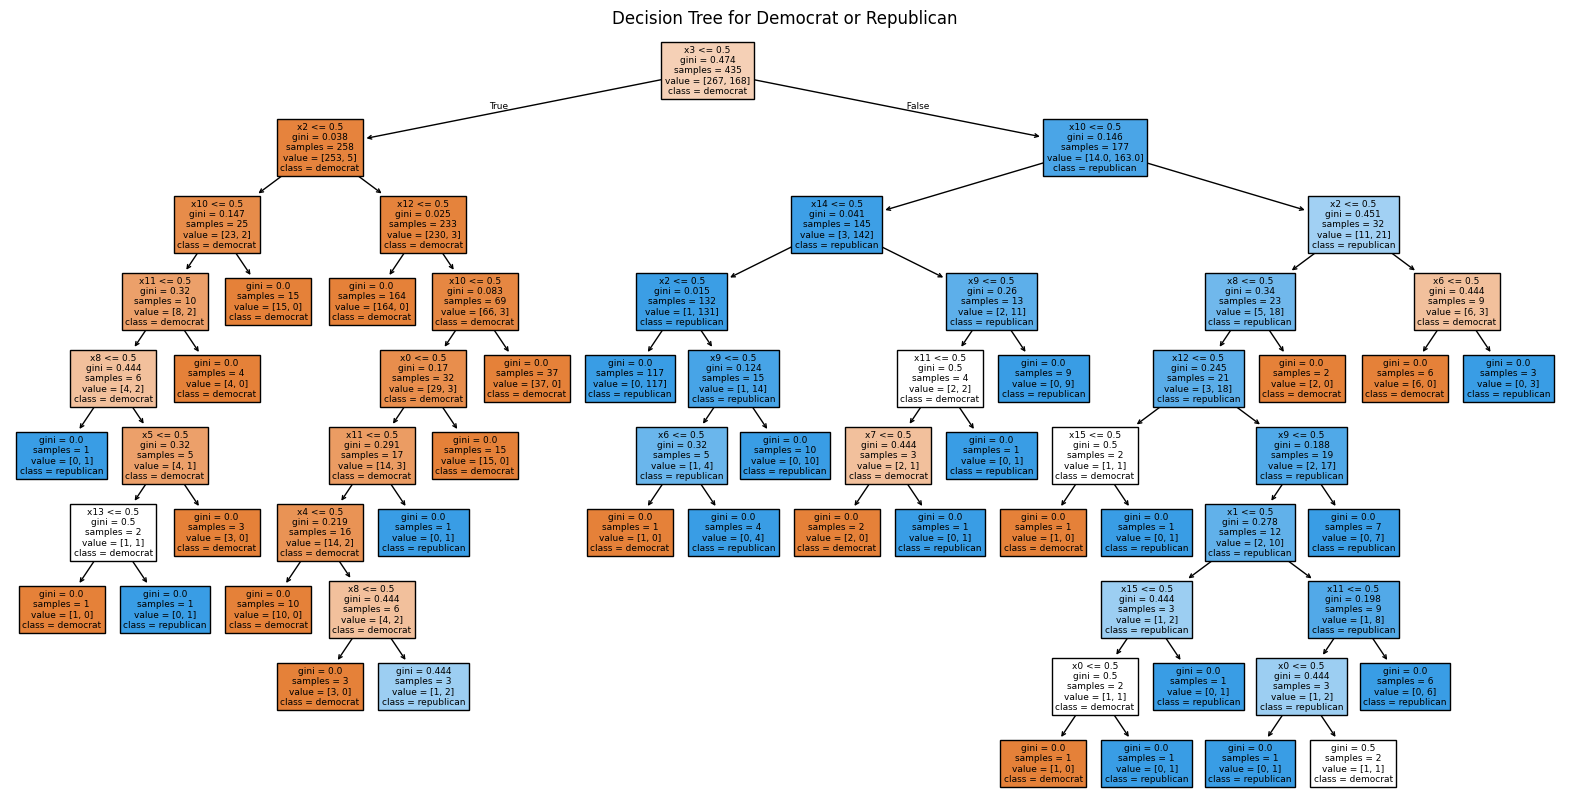

In [33]:

X3_array = X3_encoded
Y3_array = Y3_imputed

# Fit the model
clf.fit(X3_array, Y3_array)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(), class_names=np.unique(Y3_array))
plt.title("Decision Tree for Democrat or Republican")
plt.show()

Decision Tree for DATASET 4:

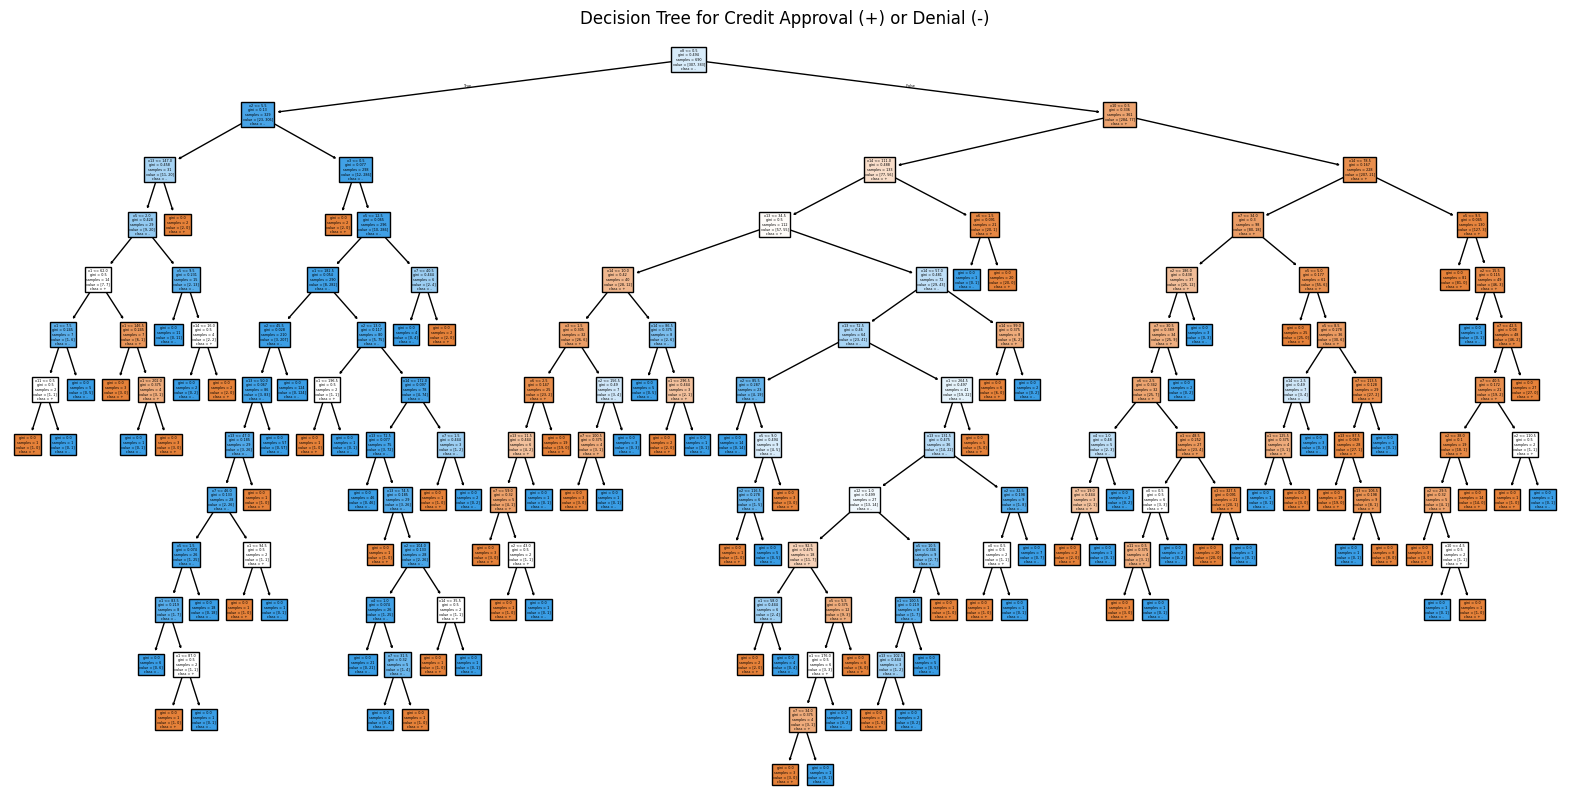

In [57]:
X4_array = X4_encoded
Y4_array = Y4_imputed

#Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)

#Fit the model
clf.fit(X4_array, Y4_array)
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=encoder.get_feature_names_out(), class_names=np.unique(Y4_array))
plt.title("Decision Tree for Credit Approval (+) or Denial (-)")
plt.show()

3.) Using the KFoldLinks item from scikit, I perform a 10 fold cross validation experiment on how well the decision tree model works on nhl_player_data, kr_vs_kp, vote, and credit_approval:

In [34]:
from sklearn.model_selection import KFold, cross_val_score

#Performs 10-fold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
#accuracy scores for DATASET 1,2,3,4:
scores1 = cross_val_score(clf, X1_array, Y1_array, cv=kfold, scoring='accuracy')


#mean scores for DATASET 1,2,3,4:
mean1 = np.mean(scores1)

#mean,std of error for DATASET 1,2,3,4:
mean_score1 = np.mean(scores1)
mean_error1 = 1 - np.mean(scores1) 
std_error1 = np.std(1-scores1)

print("DATASET 1:\n")
print(f"Mean score:{mean_score1}")
print(f"Mean Error: {mean_error1}")
print(f"Standard Deviation of Error: {std_error1}")
print("--------------------------------------------------")

DATASET 1:

Mean score:0.36
Mean Error: 0.64
Standard Deviation of Error: 0.12000000000000002
--------------------------------------------------


4.) Performing ten (10) 10-fold cross validation experiments on 4 datasets you chose above and reporting the mean of the error for the average of the ten experiments and the standard deviation of the error.

DATASET 1,2,3,4: mean of error as well as standard deviation of the error after 10 total 10-fold experiments on each

In [36]:
#Function to perform 10 rounds of 10-fold cross-validation
def n_kfolds(X, Y, n):
    clf = DecisionTreeClassifier(random_state=0)
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    
    errors = []
    scored = []
    for i in range(n):
        scores = cross_val_score(clf, X, Y, cv=kfold, scoring='accuracy')
        errors.append(1 - np.mean(scores)) 
        scored.append(scores)
    mean_score = np.mean(scored)
    mean_error = np.mean(errors)
    std_error = np.std(errors)
    
    return mean_error, std_error,mean_score

#Performs 10 rounds of 10-fold cross-validation for each DATASET and then print mean score, error, std

#DATASET 1
mean_error1, std_error1, mean_score_1 = n_kfolds(X1_array, Y1_array,10)
print("DATASET 1:\n")
print(f"Mean score:{mean_score1}")
print(f"Mean Error: {mean_error1}")
print(f"Standard Deviation of Error: {std_error1}")
print("--------------------------------------------------")
#DATASET 2
X2_array = X2_encoded
Y2_array = Y2_imputed
mean_error2, std_error2,mean_score2 = n_kfolds(X2_array, Y2_array,10)
print("DATASET 2:\n")
print(f"Mean score:{mean_score2}")
print(f"Mean Error: {mean_error2}")
print(f"Standard Deviation of Error: {std_error2}")
print("--------------------------------------------------")
#DATASET 3
X3_array = X3_encoded
Y3_array = Y3_imputed
mean_error3, std_error3, mean_score3 = n_kfolds(X3_array, Y3_array,10)
print("DATASET 3:\n")
print(f"Mean score:{mean_score3}")
print(f"Mean Error: {mean_error3}")
print(f"Standard Deviation of Error: {std_error3}")
print("--------------------------------------------------")
#DATASET 4
X4_array = X4_encoded
Y4_array = Y4_imputed
mean_error4, std_error4,mean_score4 = n_kfolds(X4_array, Y4_array,10)
print("DATASET 4:\n")
print(f"Mean score:{mean_score4}")
print(f"Mean Error: {mean_error4}")
print(f"Standard Deviation of Error: {std_error4}")
print("--------------------------------------------------")

DATASET 1:

Mean score:0.36
Mean Error: 0.6399999999999999
Standard Deviation of Error: 1.1102230246251565e-16
--------------------------------------------------
DATASET 2:

Mean score:0.9962441222570534
Mean Error: 0.0037558777429467227
Standard Deviation of Error: 0.0
--------------------------------------------------
DATASET 3:

Mean score:0.9382135306553913
Mean Error: 0.06178646934460885
Standard Deviation of Error: 0.0
--------------------------------------------------
DATASET 4:

Mean score:0.789855072463768
Mean Error: 0.21014492753623185
Standard Deviation of Error: 2.7755575615628914e-17
--------------------------------------------------
